In [1]:
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher

import pandas as pd 
import numpy as np

%matplotlib inline

In [5]:
data = pd.read_csv("static.csv", header = 0)

In [6]:
data.head(5)

,patient_id,sex,race_white,race_black,race_others,race_hispanic,esrd,sp_alzhdmta,sp_chf,sp_chrnkidn,...,sp_depressn,sp_ischmcht,sp_osteoprs,sp_ra_oa,sp_strketia,leq68,leq74,leq82,geq82,is_case
0,0000141F2FECE9BC,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0002EC0BCA99CACF,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,000433285C8D2349,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,000728F8E0D98162,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,00088BA59151404B,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
data.is_case.value_counts()

0    31980
1     4616
Name: is_case, dtype: int64

In [8]:
data.dtypes

patient_id       object
sex               int64
race_white        int64
race_black        int64
race_others       int64
race_hispanic     int64
esrd              int64
sp_alzhdmta       int64
sp_chf            int64
sp_chrnkidn       int64
sp_cncr           int64
sp_copd           int64
sp_depressn       int64
sp_ischmcht       int64
sp_osteoprs       int64
sp_ra_oa          int64
sp_strketia       int64
leq68             int64
leq74             int64
leq82             int64
geq82             int64
is_case           int64
dtype: object

In [9]:
data.sex = data.sex.astype('category')
data.race_white = data.race_white.astype('category')
data.race_black = data.race_black.astype('category')
data.race_others = data.race_others.astype('category')
data.race_hispanic = data.race_hispanic.astype('category')
data.esrd = data.esrd.astype('category')
data.sp_alzhdmta     = data.sp_alzhdmta.astype('category')
data.sp_chf     = data.sp_chf.astype('category')  
data.sp_chrnkidn     = data.sp_chrnkidn.astype('category')  
data.sp_cncr     = data.sp_cncr.astype('category')  
data.sp_copd= data.sp_copd.astype('category')  
data.sp_depressn     = data.sp_depressn.astype('category')  
data.sp_ischmcht     = data.sp_ischmcht.astype('category')  
data.sp_osteoprs     = data.sp_osteoprs.astype('category')  
data.sp_ra_oa     = data.sp_ra_oa.astype('category')  
data.sp_strketia     = data.sp_strketia.astype('category')  
data.leq68  = data.leq68.astype('category')  
data.leq74    = data.leq74.astype('category') 
data.leq82  = data.leq82.astype('category') 
data.geq82  = data.geq82.astype('category') 
data.is_case = data.is_case.astype('category')

In [10]:
data.dtypes

patient_id         object
sex              category
race_white       category
race_black       category
race_others      category
race_hispanic    category
esrd             category
sp_alzhdmta      category
sp_chf           category
sp_chrnkidn      category
sp_cncr          category
sp_copd          category
sp_depressn      category
sp_ischmcht      category
sp_osteoprs      category
sp_ra_oa         category
sp_strketia      category
leq68            category
leq74            category
leq82            category
geq82            category
is_case          category
dtype: object

Propensity Score Matching

In [11]:
# set is_case == 1 as test, is_case == 0 as control
test = data[data.is_case == 1]
control = data[data.is_case == 0]

In [12]:
test

,patient_id,sex,race_white,race_black,race_others,race_hispanic,esrd,sp_alzhdmta,sp_chf,sp_chrnkidn,...,sp_depressn,sp_ischmcht,sp_osteoprs,sp_ra_oa,sp_strketia,leq68,leq74,leq82,geq82,is_case
5,000A7207FF59E5E5,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
23,002F6D120B2DD651,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
38,00455E45EC431A2D,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
42,00493C37C2DD6658,1,1,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
45,004D66D563DED309,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
49,0050327B79DCD354,0,1,0,0,0,1,1,0,1,...,0,1,1,1,0,0,0,0,1,1
53,00561865CB3EF1C3,1,1,0,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
61,0073222EC7BCA203,0,0,1,0,0,1,0,0,1,...,1,1,0,1,0,1,0,0,0,1
111,00BF2E1E8AECE94E,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
116,00C838A6B964A85A,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [13]:
#Matcher 
m = Matcher(test, control, yvar="is_case",exclude=["patient_id"])

Formula:
is_case ~ sex+race_white+race_black+race_others+race_hispanic+esrd+sp_alzhdmta+sp_chf+sp_chrnkidn+sp_cncr+sp_copd+sp_depressn+sp_ischmcht+sp_osteoprs+sp_ra_oa+sp_strketia+leq68+leq74+leq82+geq82
n majority: 31980
n minority: 4616


In [14]:
#nmodels depends on the imblance
#estimate Propensity Scoere by Logistic Regression

np.random.seed(20200421)
m.fit_scores(balance=True, nmodels=10)

Fitting Models on Balanced Samples: 10\10
Average Accuracy: 64.21%


In [15]:
m.predict_scores()

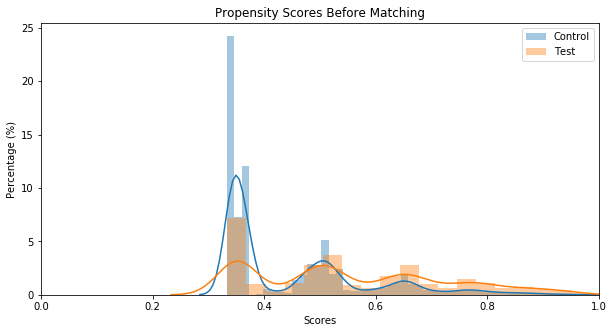

In [16]:
m.plot_scores()

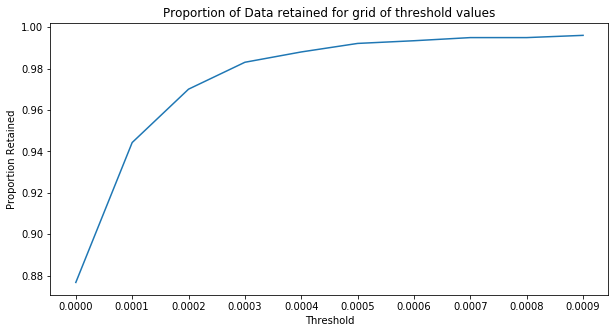

In [17]:
m.tune_threshold(method='random')


In [30]:
# match test and control record
m.match(method="min", nmatches=1000, threshold=0.004)
m.record_frequency()

,freq,n_records
0,1,4865
1,2,457
2,3,165
3,4,79
4,5,224
5,6,315
6,7,65
7,8,189
8,9,40
9,10,352


In [31]:
m.assign_weight_vector()

In [32]:
m.matched_data

,record_id,weight,patient_id,sex,race_white,race_black,race_others,race_hispanic,esrd,sp_alzhdmta,...,sp_osteoprs,sp_ra_oa,sp_strketia,leq68,leq74,leq82,geq82,is_case,scores,match_id
0,0,1.000000,000A7207FF59E5E5,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.511723,0
1,1,1.000000,002F6D120B2DD651,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0.471915,1
2,2,1.000000,00455E45EC431A2D,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0.468870,2
3,3,1.000000,00493C37C2DD6658,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0.959870,3
4,4,1.000000,004D66D563DED309,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0.510147,4
5,5,1.000000,0050327B79DCD354,0,1,0,0,0,1,1,...,1,1,0,0,0,0,1,1,0.946320,5
6,6,1.000000,00561865CB3EF1C3,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0.875039,6
7,7,1.000000,0073222EC7BCA203,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0.961794,7
8,8,1.000000,00BF2E1E8AECE94E,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.351889,8
9,9,1.000000,00C838A6B964A85A,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.344876,9


In [33]:
matched_control = m.matched_data[m.matched_data.is_case == 0]
matched_control.patient_id.nunique()

26973

In [34]:
scores = matched_control.groupby(['patient_id'], as_index=True).agg({'scores': 'max',  'match_id': 'first'})
scores


,scores,match_id
patient_id,,
0000141F2FECE9BC,0.346672,12
000433285C8D2349,0.491041,44
000728F8E0D98162,0.682291,11
000AFA21045C1BC3,0.817154,3
000D5502EDFE0C5F,0.458533,64
000F39F1C0B54072,0.521645,41
000FC8902C12111C,0.505157,28
0016FBA845594024,0.497229,161
0017CB27CFE0E78E,0.765056,10


In [35]:
matched_test = m.matched_data[m.matched_data.is_case == 1]
matched_test

,record_id,weight,patient_id,sex,race_white,race_black,race_others,race_hispanic,esrd,sp_alzhdmta,...,sp_osteoprs,sp_ra_oa,sp_strketia,leq68,leq74,leq82,geq82,is_case,scores,match_id
0,0,1.0,000A7207FF59E5E5,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0.511723,0
1,1,1.0,002F6D120B2DD651,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0.471915,1
2,2,1.0,00455E45EC431A2D,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0.468870,2
3,3,1.0,00493C37C2DD6658,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0.959870,3
4,4,1.0,004D66D563DED309,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0.510147,4
5,5,1.0,0050327B79DCD354,0,1,0,0,0,1,1,...,1,1,0,0,0,0,1,1,0.946320,5
6,6,1.0,00561865CB3EF1C3,1,1,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0.875039,6
7,7,1.0,0073222EC7BCA203,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0.961794,7
8,8,1.0,00BF2E1E8AECE94E,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0.351889,8
9,9,1.0,00C838A6B964A85A,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.344876,9


In [104]:
#this is for qihang

In [36]:
id_pair = {}
for index, id in  matched_test['record_id'].iteritems():
    id_pair[id] = matched_test.loc[matched_test['record_id'] == id, 'patient_id'].iloc[0]

count = 0
new_patient_id = []
for index, id in  scores['match_id'].iteritems():
        new_patient_id.append(id_pair[id])
        count+=1
scores['test_patient_id'] = new_patient_id

In [39]:
scores

,patient_id,scores,match_id,test_patient_id
0,0000141F2FECE9BC,0.346672,12,01338F8D6C7B54FF
1,000433285C8D2349,0.491041,44,033BC90FC96B6D81
2,000728F8E0D98162,0.682291,11,01292168FF3901C4
3,000AFA21045C1BC3,0.817154,3,00493C37C2DD6658
4,000D5502EDFE0C5F,0.458533,64,0468B41BB4FED84C
5,000F39F1C0B54072,0.521645,41,02EAE9CDDE3EE6A0
6,000FC8902C12111C,0.505157,28,022390BA327AC309
7,0016FBA845594024,0.497229,161,095EDB36747F6CAC
8,0017CB27CFE0E78E,0.765056,10,00DC18CEF13F53E0
9,001CBE133E8D6677,0.750774,10,00DC18CEF13F53E0


In [37]:
count

26973

In [40]:
scores = scores.reset_index()
scores.test_patient_id.nunique()

64

In [41]:
output = scores[['patient_id', 'test_patient_id']]

In [42]:
output

,patient_id,test_patient_id
0,0000141F2FECE9BC,01338F8D6C7B54FF
1,000433285C8D2349,033BC90FC96B6D81
2,000728F8E0D98162,01292168FF3901C4
3,000AFA21045C1BC3,00493C37C2DD6658
4,000D5502EDFE0C5F,0468B41BB4FED84C
5,000F39F1C0B54072,02EAE9CDDE3EE6A0
6,000FC8902C12111C,022390BA327AC309
7,0016FBA845594024,095EDB36747F6CAC
8,0017CB27CFE0E78E,00DC18CEF13F53E0
9,001CBE133E8D6677,00DC18CEF13F53E0


In [43]:
output.to_csv('out_new.csv',index=False)